In [7]:
# Author: Yash Dani and Meet Kumar Patel
# 27th April 2020
# Final Project

import os
import sys
from PIL import Image
import numpy as np
from prettytable import PrettyTable
os.getcwd()  #To check the current working directory

'C:\\Users\\Owner\\Downloads\\Object Detection'

In [0]:
from __future__ import division
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dset  #To load the dataset

In [0]:
training_data = dset.CocoDetection(root = 'C:/Users/Owner/Downloads/Object Detection/train2017', annFile = 'C:/Users/Owner/Downloads/Object Detection/annotations/instances_train2017.json')
len(training_data)

loading annotations into memory...
Done (t=26.65s)
creating index...
index created!


118287

In [0]:
validation_data = dset.CocoDetection(root = 'C:/Users/Owner/Downloads/Object Detection/val2017', annFile = 'C:/Users/Owner/Downloads/Object Detection/annotations/instances_val2017.json')
len(validation_data)

loading annotations into memory...
Done (t=2.27s)
creating index...
index created!


5000

In [0]:
#We have added this file externally
classes = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light", 
           "fire hydrant", "street sign", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", 
           "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "hat", "backpack", "umbrella", "shoe", "eye glasses", 
           "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", 
           "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "plate", "wine glass", "cup", 
           "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", 
           "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "mirror", "dining table", "window", "desk", 
           "toilet", "door", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", 
           "blender", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush", "hair brush",]
len(classes)

91

In [0]:
#we are trying to run VGG16 model for the data to compare accuracy but because of the low configuration of system it took a lot of time to just read 3000 data from one module 
train_images = []
train_labels = []
for i in range(len(training_data)//30):  #Loop to iterate the training data
    train_images.append(training_data[i])
    train_labels.append(training_data[i])
    print(len(train_images))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


KeyboardInterrupt: 

In [0]:
trained_image, trained_label = training_data[13516]

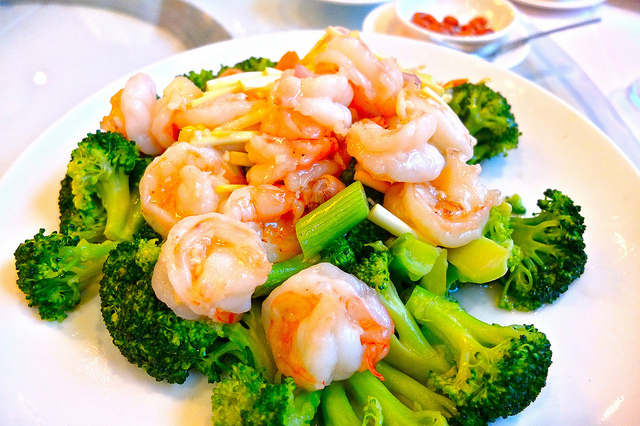

In [0]:
trained_image  #Image that is trained

In [0]:
#Here we am using matplotlib to plot the chart with bounding boxes
import matplotlib.pyplot as plt

#Converted image into np.array to get the information of height and width of image as well as RGB format details
trained_image=np.array(trained_image)
print('Image size: (Height, Width, RGB):', trained_image.shape)

bbox_counter =0
class_label=[]
bounding_boxes = []
for d in trained_label:  #To iterate the trained labels
  bb = d['bbox']
  cl=d['category_id']
  class_label.append(cl)
  bounding_boxes.append(bb)
  bbox_counter = bbox_counter +1
print("")
#printing number of objects in image and bounding boxes dimentions
print('Num of objects:', bbox_counter)
print('Bounding Boxes (num_boxes, x_min, y_min, x_max, y_max)')
print(bounding_boxes)
print("")
#printing class labels and respective class names
print("Class Labels:")
for i in range(bbox_counter):
  print(class_label[i],":",classes[class_label[i]-1])

print("")
trained_label = np.array(trained_label)
print("Shape of Class Label: ",trained_label.shape)

Image size: (Height, Width, RGB): (426, 640, 3)

Num of objects: 13
Bounding Boxes (num_boxes, x_min, y_min, x_max, y_max)
[[393.45, 0.96, 126.37, 48.82], [402.95, 284.67, 151.35, 136.32], [488.29, 187.88, 98.46, 125.59], [12.97, 232.55, 101.76, 90.79], [59.23, 133.02, 95.89, 115.73], [97.23, 229.54, 207.49, 191.45], [491.86, 41.95, 37.76, 28.23], [476.27, 17.73, 124.55, 39.16], [445.15, 80.41, 73.71, 83.29], [286.23, 363.78, 180.93, 57.43], [182.64, 56.06, 98.26, 33.5], [267.42, 180.21, 180.22, 195.49], [385.06, 230.15, 67.5, 57.54]]

Class Labels:
51 : bowl
56 : broccoli
56 : broccoli
56 : broccoli
56 : broccoli
56 : broccoli
50 : spoon
50 : spoon
56 : broccoli
56 : broccoli
56 : broccoli
56 : broccoli
56 : broccoli

Shape of Class Label:  (13,)


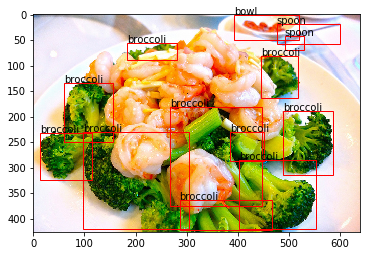

In [0]:
import matplotlib
import matplotlib.patches as patches
from PIL import Image
matplotlib.use('TkAgg')
im = np.array((trained_image), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots()
# Display the image
ax.imshow(im)
# Create a Rectangle patch
for i in range(bbox_counter):
    rect = patches.Rectangle((bounding_boxes[i][0],bounding_boxes[i][1]),bounding_boxes[i][2],bounding_boxes[i][3],linewidth=1,edgecolor='r',facecolor='none',)
    plt.text(bounding_boxes[i][0],bounding_boxes[i][1],classes[class_label[i]-1])
# Add the patch to the Axes
    ax.add_patch(rect)

    
plt.show()
#the image will be shown in other window 

In [1]:
import struct
import numpy as np
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU  #Relu Activation function for Convolutional layer
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model

Using TensorFlow backend.
C:\Users\Owner\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Owner\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Owner\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Owner\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
#YOLO v3 model 
#Can be defind to pool the input size after a convolutional block is defined.
def Max_Pool_block(Input,psize,fil,strid,skip=True):
    #psize=pool_size
    #fil=filter
    #strides=filter size if not specified else the stride size
    op=MaxPool2D(input=Input,filter=fil,pool_size=(psize),strides=strid, padding='valid')
    return op

#This convolutional_block is helper function to our yolov3 model   
def convolutional_block(in_put, convolutions, skip=True):
    x = in_put
    count = 0
    for con in convolutions:
        if count == (len(convolutions) - 2) and skip:
            skipconnection = x
        count =count+ 1
        if con['stride'] > 1: x = ZeroPadding2D(((1,0),(1,0)))(x)
            #adding a convolutional layer to the network.
            #if padding =valid then 0 if check for same.
        x = Conv2D(con['filter'], con['kernel'], strides=con['stride'], padding='valid' if con['stride'] > 1 else 'same', 
                   name='conv_' + str(con['layer_idx']),
                   use_bias=False if con['bnorm'] else True)(x)
        #checking for batch normalisation
        if con['bnorm']: x = BatchNormalization(epsilon=0.001, name='bnorm_' + str(con['layer_idx']))(x)
        #checking for leaky relu
        if con['leaky']: x = LeakyReLU(alpha=0.1, name='leaky_' + str(con['layer_idx']))(x)
    return add([skipconnection, x]) if skip else x

 #The model is taken from the reference
def yolov3_model():
    input_image = Input(shape=(None, None, 3))

    # layers from 0 to 4
    #various types of parameters are given to the convolution block function
    x = convolutional_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
                                  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
                                  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
                                  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])
    # Layers from 5 to 8
    x = convolutional_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
                        {'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])
    # Layers from 9 to 11
    x = convolutional_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 9},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])
    # Layers from 12 to 15
    x = convolutional_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
                        {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
                        {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])
    # Layers from 16 to 36
    for i in range(7):
        x = convolutional_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
                            {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])
    skip_36 = x
    # Layers from 37 to 40
    x = convolutional_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])
    # Layers from 41 to 61
    for i in range(7):
        x = convolutional_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
                            {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])
    skip_61 = x
    # Layers from 62 to 65
    x = convolutional_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])
    # Layers from 66 to 74
    for i in range(3):
        x = convolutional_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
                            {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])
    # Layers from 75 to 79
    x = convolutional_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], skip=False)
    # Layers from 80 to 82
    yolo_till_layer_82 = convolutional_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
                              {'filter':  255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], skip=False)
    # Layers from 83 to 86
    x = convolutional_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_61])
    # Layers from 87 to 91
    x = convolutional_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], skip=False)
    # Layers from 92 to 94
    yolo_till_layer_94 = convolutional_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
                              {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], skip=False)
    # Layers from 95 to 98
    x = convolutional_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_36])
    #yolo_pool_layer_98=Max_Pool_block(input_image,(2,2),32,1,skip=True)
    # Layers from 99 to 106
    yolo_till_layer_106 = convolutional_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
                               {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], skip=False)
    our_model = Model(input_image, [yolo_till_layer_82, yolo_till_layer_94, yolo_till_layer_106])
    return our_model
 
class GetWeights:
    def __init__(self, weight_file):
        with open(weight_file, 'rb') as wght_file:
            primary, = struct.unpack('i', wght_file.read(4))
            secondary, = struct.unpack('i', wght_file.read(4))
            revision, = struct.unpack('i', wght_file.read(4))
            if (secondary+primary*10) >= 2 and primary < 1000 and secondary < 1000:
                wght_file.read(8)
            else:
                wght_file.read(4)
            transpose = (primary > 1000) or (secondary > 1000)
            binary = wght_file.read()
        self.offset = 0
        self.all_weights = np.frombuffer(binary, dtype='float32')
#this function reads byte values for size of the image
    def read_bytes(self, size):
        self.offset = self.offset + size
        return self.all_weights[self.offset-size:self.offset]

   #given weights and model will be passed in this function to get convolution layer's information 
    def load_weights(self, new_model):
        for i in range(106):
            try:
                convo_layer = new_model.get_layer('conv_' + str(i))
                print("Loading weights of convolution no: " + str(i))
                if i not in [81, 93, 105]:
                    norm_layer = new_model.get_layer('bnorm_' + str(i))
                    size = np.prod(norm_layer.get_weights()[0].shape)
                    var   = self.read_bytes(size)
                    beta  = self.read_bytes(size)  
                    mean  = self.read_bytes(size) 
                    gamma = self.read_bytes(size) 
                    weights = norm_layer.set_weights([gamma, beta, mean, var])
                if len(convo_layer.get_weights()) > 1:
                    bias   = self.read_bytes(np.prod(convo_layer.get_weights()[1].shape))
                    kernel = self.read_bytes(np.prod(convo_layer.get_weights()[0].shape))
                    kernel = kernel.reshape(list(reversed(convo_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2,3,1,0])
                    convo_layer.set_weights([kernel, bias])
                else:
                    kernel = self.read_bytes(np.prod(convo_layer.get_weights()[0].shape))
                    kernel = kernel.reshape(list(reversed(convo_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2,3,1,0])
                    convo_layer.set_weights([kernel])
            except ValueError:
                print("No convolution #" + str(i))
 
    def reset(self):
        self.offset = 0

# calling yolov3 model 
new_model = yolov3_model()
# here we load pretrained model weights
weight_reader = GetWeights('yolov3.weights')
# we will load pretrained weights in the model we get from above line
weight_reader.load_weights(new_model)
# this function will save model, which we can use because it will be saved in local directory 
new_model.save('yolov3model1.h5')
print('Model saved as: yolov3model1.h5')








Loading weights of convolution no: 0
Loading weights of convolution no: 1
Loading weights of convolution no: 2
Loading weights of convolution no: 3
No convolution #4
Loading weights of convolution no: 5
Loading weights of convolution no: 6
Loading weights of convolution no: 7
No convolution #8
Loading weights of convolution no: 9
Loading weights of convolution no: 10
No convolution #11
Loading weights of convolution no: 12
Loading weights of convolution no: 13
Loading weights of convolution no: 14
No convolution #15
Loading weights of convolution no: 16
Loading weights of convolution no: 17
No convolution #18
Loading weights of convolution no: 19
Loading weights of convolution no: 20
No convolution #21
Loading weights of convolution no: 22
Loading weights of convolution no: 23
No convolution #24
Loading weights of convolution no: 25
Loading weights of convolution no: 26
No convolution #27
Loading weights of convolution no: 28
Loading weights of convolution no: 29
No convolution 

In [3]:
import numpy as np
from numpy import expand_dims
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [4]:
#these are the class labels for objects' bounding boxes
class_labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
    "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
    "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
    "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
    "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
    "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
    "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
    "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
    "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
    "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]
len(class_labels)

80

In [5]:
class BoundBox:
    #this class has all the function to get dimensions for bounding boxes in the image
    #it returns those scores by which matplotlib can draw boxes around the objects
    def __init__(self, x_min, y_min, x_max, y_max, objectness = None, classes = None):
        self.x_min = x_min
        self.y_min = y_min
        self.x_max = x_max
        self.y_max = y_max
        self.label = -1
        self.score = -1
        self.objectness = objectness
        self.classes = classes
        
    def get_score(self):
        if self.score == -1:
            self.score = self.classes[self.get_label()]
        return self.score
    
    def get_label(self):
        if self.label == -1:
            self.label = np.argmax(self.classes)
        return self.label

#Used Sigmoid Activation function for the bounding boxes 
def sigmoid_function(x):
    result = 1. / (1. + np.exp(-x))
    return result

#Tried other activation function to see variation in the accuracy
def linear(x):
    return(x)

def hardlimit(x):
    if(x<0):
        return 0
    else:
        return 1

def decode_y_hat(y_hat, anchors, obj_thresh, net_h, net_w):
    #calculating height and weight from the shape of the desired output
    grid_h, grid_w = y_hat.shape[:2]
    #specify box size for reshaping
    nb_box = 3
    y_hat = y_hat.reshape((grid_h, grid_w, nb_box, -1))
    nb_class = y_hat.shape[-1] - 5
    boxes = []
    y_hat[..., :2]  = sigmoid_function(y_hat[..., :2])
    y_hat[..., 4:]  = sigmoid_function(y_hat[..., 4:])
    y_hat[..., 5:]  = y_hat[..., 4][..., np.newaxis] * y_hat[..., 5:]
    y_hat[..., 5:] *= y_hat[..., 5:] > obj_thresh

    for i in range(grid_h*grid_w):
        row = i / grid_w
        col = i % grid_w
        for b in range(nb_box):
            
            objectness = y_hat[int(row)][int(col)][b][4]
            if(objectness.all() <= obj_thresh): continue
            
            x_center, y_center, weight,height= y_hat[int(row)][int(col)][b][:4]
            #getting the center positions
            x_center = (col + x_center) / grid_w 
            y_center = (row + y_center) / grid_h 
            #getting the weight and the height positions
            weight = anchors[2 * b + 0] * np.exp(weight) / net_w 
            
            height = anchors[2 * b + 1] * np.exp(height) / net_h 
            #returning the class labels of the images
            classes = y_hat[int(row)][col][b][5:]
            
            #defining the bounding box for the image
            box = BoundBox(x_center-weight/2, y_center-height/2, x_center+weight/2, y_center+height/2, objectness, classes)
            #creating array of bounding boxes
            boxes.append(box)
    return boxes

def yolo_bbox(net_h,net_w):
    b_xcenter=net_h/2
    b_ycenter=net_w/2
    for i in range(b_xcenter):
        x_offset = b_xcenter + b_ycenter
    for i in range(b_ycenter):
        y_offset = b_xcenter - b_ycenter
    
    return (x_offset,y_offset)
        
        
def yolo_bounding_boxes(boxes, image_h, image_w, net_h, net_w):
    new_w, new_h = net_w, net_h
    for i in range(len(boxes)):
        x_offset, x_scale = (net_w - new_w)/2./net_w, float(new_w)/net_w
        y_offset, y_scale = (net_h - new_h)/2./net_h, float(new_h)/net_h
        boxes[i].x_min = int((boxes[i].x_min - x_offset) / x_scale * image_w)
        boxes[i].x_max = int((boxes[i].x_max - x_offset) / x_scale * image_w)
        boxes[i].y_min = int((boxes[i].y_min - y_offset) / y_scale * image_h)
        boxes[i].y_max = int((boxes[i].y_max - y_offset) / y_scale * image_h)

def intersect_lap(x, y):
    left,right = x
    up, down = y
    if up < left:
        if down < left:
            return 0
        else:
            z =min(right,down) - left 
            return z
    else:
        if right < up:
             return 0
        else:
            net=min(right,down) - up
            return net

#intersection over union
def bounding_box_IOU(box1, box2):
    #calculating the intersections of the weight and height
    weight_i = intersect_lap([box1.x_min, box1.x_max], [box2.x_min, box2.x_max])
    height_i = intersect_lap([box1.y_min, box1.y_max], [box2.y_min, box2.y_max])
    overlap = weight_i * height_i
    
    #getting the co-ordinates of the weight and height from the boxes
    weight1, height1 = box1.x_max-box1.x_min, box1.y_max-box1.y_min
    weight2, height2 = box2.x_max-box2.x_min, box2.y_max-box2.y_min
    #calculating the intersection and union
    u = weight1*height1 + weight2*height2 - overlap
    #print(union)
    #return out
    out=float(overlap) / u
    #print(out)
    return out


#ignoring the bounding boxes less than threshold
def do_nms(boxes, nms_thresh):
    if len(boxes) > 0:
        bound_c = len(boxes[0].classes)
    else:
        return
    for c in range(bound_c):
        #iterating over the range of the bounding classes
        class_sort = np.argsort([-box.classes[c] for box in boxes])
        #iterating over the lenght of the sorted indices
        for i in range(len(class_sort)):
            #getting the index of the sorted classes
            sort_i = class_sort[i]
            #value(boxes)=0 then skip
            if boxes[sort_i].classes[c] == 0: continue
            #iterating to get the sorted indices
            for j in range(i+1, len(class_sort)):
                sort_j = class_sort[j]
                if bounding_box_IOU(boxes[sort_i], boxes[sort_j]) >= nms_thresh:
                    #getting the sorted bounding boxes accorfing to classes
                    boxes[sort_j].classes[c] = 0

                    

def load_image_pixels(filename, shape):
    #loading the image file
    image = load_img(filename)
    
    #getting the dimensions of the image
    w, h = image.size
    
    #converting image to desired shape
    image = load_img(filename, target_size=shape)
    #vectorising the image to an array
    image = img_to_array(image)
    #reshaping the image pixels
    image = image.astype('float32')
    image = image/ 255.0
    image = expand_dims(image, 0)
    
    #returning the image as a numpy array and the dimensions
    return image, w, h


#function to return all the values over a given value(thresh)
def get_boxes(boxes, class_labels, thresh):
    #initiliasing the boxes, labels and scores
    bbox, label, score = list(), list(), list()
    #iterating over all the boxes
    for box in boxes:
        #iterating over the class labels
        for i in range(len(class_labels)):
            # comparing the threshold values with the class threshold 
            if box.classes[i] > thresh:
                #if threshold pass then append
                bbox.append(box)
                #append the labels whose threshold value is passed.
                label.append(class_labels[i])
                score.append(box.classes[i]*100)
    return bbox, label, score

#function to draw all the boxes which pass the threshold test
def show_bounding_boxes(filename, bbox, label, score):
    data = plt.imread(filename)
    #plotting the loaded image
    plt.imshow(data)
    ax = plt.gca()
    #iterating over all the plotted boxes
    for i in range(len(bbox)):
        box = bbox[i]
        y1, x1, y2, x2 = box.y_min, box.x_min, box.y_max, box.x_max
        width, height = x2 - x1, y2 - y1
        #making the bounding box from the calculated dimensions above.
        rect = Rectangle((x1, y1), width, height, fill=False, color='green')
        ax.add_patch(rect)
        class_label = "%s" % (label[i])
        plt.text(x1, y1, class_label, color='white')
    plt.show(block=False)
    plt.show()


(1, 13, 13, 255)
(1, 26, 26, 255)
(1, 52, 52, 255)
accuracy that it belongs to the given class

+------------+-------------------+
|  Objects   |      Accuracy     |
+------------+-------------------+
|   person   | 70.97461223602295 |
|   person   | 79.09252047538757 |
|   person   | 98.78689646720886 |
|   person   | 99.37533736228943 |
|   person   | 99.07562732696533 |
| cell phone | 72.90456295013428 |
|   person   | 96.94681763648987 |
+------------+-------------------+

Average accuracy:  88.16519635064262


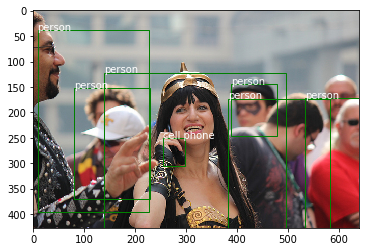

In [9]:
#Loading our model i.e yolov3
model = load_model('model.h5')

#initialising the input weight and height for yolov3
input_w, input_h = 416, 416

# getting a random image
image_name = 'C:/Users/Owner/Downloads/Object Detection/val2017/000000006771.jpg'

# preprocessing of the image
image, image_w, image_h = load_image_pixels(image_name, (input_w, input_h))

#predicting the output 
yhat = model.predict(image)
#print(yhat)
#appending to the array
for j in yhat:
    print(j.shape)
#print([a.shape for a in yhat])

anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]

#initialisng a random value for threshold
class_threshold = 0.59
boxes = list()

for i in range(len(yhat)):
    boxes = boxes + decode_y_hat(yhat[i][0], anchors[i], class_threshold, input_h, input_w)
#reshaping the bbox
yolo_bounding_boxes(boxes, image_h, image_w, input_h, input_w)
# setting configuration parameter
do_nms(boxes, 0.5)

#getting box,label and score value of the boxes in an image
box, label, score = get_boxes(boxes, class_labels, class_threshold)
# describing all accuracies and detected objects in the given image
print("accuracy that it belongs to the given class")
print("")

#this prettytable library is used to print our data in tabular form 
tbl = PrettyTable(['Objects', 'Accuracy'])
for i in range(len(label)):
    tbl.add_row([label[i], score[i]])
print(tbl)

def Average(arr):
    sum=0
    for i in range(len(arr)):
        sum = sum + arr[i]
    return sum/len(arr)

#this function calculates average accuracy for the given image
average = Average(score)
print("\nAverage accuracy: ",average)

# this function will display the detected objects in image in diffrent window 
show_bounding_boxes(image_name, box, label, score)